In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

In [2]:
import numpy as np
from numpy.linalg import inv, norm
from itertools import product
from copy import deepcopy

from BZI.symmetry import (find_full_orbitals, make_ptvecs,
                          make_rptvecs, reduce_kpoint_list)
from BZI.sampling import make_cell_points
from BZI.plots import plot_mesh

In [92]:
lat_consts = [2*np.pi]*3
lat_angles = [np.pi/2]*3
lat_center = 'body'
lat_vecs = make_ptvecs(lat_center, lat_consts, lat_angles)
rlat_vecs = make_rptvecs(lat_vecs)

HNF = [[2,0,0],[0,2,0],[0,0,2]]
grid_vecs = np.dot(rlat_vecs, inv(HNF))

grid_offset = [0.0, 0.0, 0.0]
# offset = np.dot(inv(grid_vecs), np.dot(rlat_vecs, grid_offset))
grid = make_cell_points(rlat_vecs, grid_vecs, grid_offset)

In [93]:
print("shift = (/ " + "_dp, ".join(map(str, np.round(grid_offset, 4))) + "_dp" + " /)")

# Print the reciprocal lattice vectors in a format that is 
# easy to copy and paste into Fortran code.
for i, r in enumerate(rlat_vecs):
    if i == 0:
        print("R = transpose(reshape((/ " + 
              "_dp, ".join(map(str, np.round(r, 4))) + "_dp, &")
    elif i == 1:
        print("                          " + 
              "_dp, ".join(map(str, np.round(r, 4))) + "_dp, &")
    else: 
        print("                          " + 
              "_dp, ".join(map(str, np.round(r, 4))) + "_dp /)," + 
             "(/3,3/)))")
        
# Print the reciprocal lattice vectors in a format that is 
# easy to copy and paste into Fortran code.
for i, r in enumerate(HNF):
    if i == 0:
        print("H = transpose(reshape((/ " + 
              ", ".join(map(str, np.round(r, 4))) + ", &")
    elif i == 1:
        print("                          " + 
              ", ".join(map(str, np.round(r, 4))) + ", &")
    else:
        print("                          " + 
              ", ".join(map(str, np.round(r, 4))) + " /)," + 
             "(/3,3/)))")

shift = (/ 0.0_dp, 0.0_dp, 0.0_dp /)
R = transpose(reshape((/ -0.0_dp, 1.0_dp, 1.0_dp, &
                          1.0_dp, 0.0_dp, 1.0_dp, &
                          1.0_dp, 1.0_dp, 0.0_dp /),(/3,3/)))
H = transpose(reshape((/ 2, 0, 0, &
                          0, 2, 0, &
                          0, 0, 2 /),(/3,3/)))


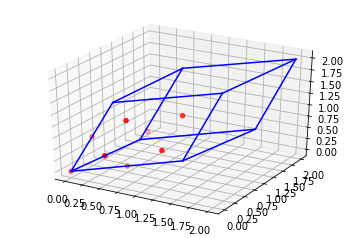

In [94]:
plot_mesh(grid, rlat_vecs, [0]*3)

In [95]:
reduced_grid,weights = reduce_kpoint_list(grid, rlat_vecs, 
                                  grid_vecs, grid_offset,eps=9)

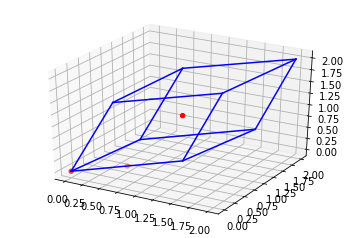

In [96]:
plot_mesh(reduced_grid, rlat_vecs, [0]*3)

In [111]:
creduced_grid = deepcopy(reduced_grid)
for i,g in enumerate(reduced_grid):
    creduced_grid[i] = g
    for t in product(range(-2,2), repeat=3):
        gtrans = np.dot(rlat_vecs, t) + g
        print(gtrans)
        if norm(gtrans) < norm(creduced_grid[i]):
            creduced_grid[i] = gtrans

[-4. -4. -4.]
[-3. -3. -4.]
[-2. -2. -4.]
[-1. -1. -4.]
[-3. -4. -3.]
[-2. -3. -3.]
[-1. -2. -3.]
[ 0. -1. -3.]
[-2. -4. -2.]
[-1. -3. -2.]
[ 0. -2. -2.]
[ 1. -1. -2.]
[-1. -4. -1.]
[ 0. -3. -1.]
[ 1. -2. -1.]
[ 2. -1. -1.]
[-4. -3. -3.]
[-3. -2. -3.]
[-2. -1. -3.]
[-1.  0. -3.]
[-3. -3. -2.]
[-2. -2. -2.]
[-1. -1. -2.]
[ 0.  0. -2.]
[-2. -3. -1.]
[-1. -2. -1.]
[ 0. -1. -1.]
[ 1.  0. -1.]
[-1. -3.  0.]
[ 0. -2.  0.]
[ 1. -1.  0.]
[ 2.  0.  0.]
[-4. -2. -2.]
[-3. -1. -2.]
[-2.  0. -2.]
[-1.  1. -2.]
[-3. -2. -1.]
[-2. -1. -1.]
[-1.  0. -1.]
[ 0.  1. -1.]
[-2. -2.  0.]
[-1. -1.  0.]
[ 0.  0.  0.]
[ 1.  1.  0.]
[-1. -2.  1.]
[ 0. -1.  1.]
[ 1.  0.  1.]
[ 2.  1.  1.]
[-4. -1. -1.]
[-3.  0. -1.]
[-2.  1. -1.]
[-1.  2. -1.]
[-3. -1.  0.]
[-2.  0.  0.]
[-1.  1.  0.]
[ 0.  2.  0.]
[-2. -1.  1.]
[-1.  0.  1.]
[ 0.  1.  1.]
[ 1.  2.  1.]
[-1. -1.  2.]
[ 0.  0.  2.]
[ 1.  1.  2.]
[ 2.  2.  2.]
[-3.5 -3.5 -4. ]
[-2.5 -2.5 -4. ]
[-1.5 -1.5 -4. ]
[-0.5 -0.5 -4. ]
[-2.5 -3.5 -3. ]
[-1.5 -2.5 -3. ]
[-

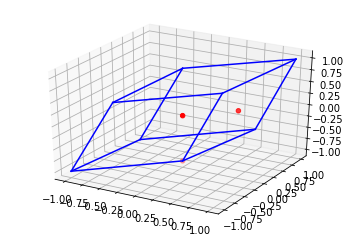

In [98]:
plot_mesh(creduced_grid, rlat_vecs, -np.sum(rlat_vecs, 1)/2)

In [106]:
rlat_vecs

array([[-0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.]])

In [108]:
vec = [1.,1.,1.]
vec = np.dot(inv(rlat_vecs), vec)%1
vec = np.dot(rlat_vecs, vec)

In [110]:
np.round(reduced_grid, 3)

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0. ],
       [ 1. ,  1. ,  1. ]])

In [100]:
for i,j in zip(creduced_grid, weights):
    print(np.round(i, 3), np.round(j, 3))

[ 0.  0.  0.] 1
[ 0.5  0.5  0. ] 6
[ 0.  0. -1.] 1


All below is trying to figure out what is going on with the Minkowski reducion.

In [125]:
from phenum.vector_utils import _minkowski_reduce_basis

In [131]:
mink_rlatvecs = _minkowski_reduce_basis(rlat_vecs, 1e-10)

In [132]:
vec

array([ 1.,  1.,  1.])

In [133]:
rlat_vecs

array([[-0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.]])

In [140]:
mink_rlatvecs.T

array([[ 1.,  0., -0.],
       [ 0.,  1.,  1.],
       [ 1., -1.,  1.]])

In [144]:
for vec in grid:
    print(np.dot(inv(rlat_vecs), vec)%1)

[ 0.  0.  0.]
[ 0.   0.   0.5]
[ 0.   0.5  0. ]
[ 0.   0.5  0.5]
[ 0.5  0.   0. ]
[ 0.5  0.   0.5]
[ 0.5  0.5  0. ]
[ 0.5  0.5  0.5]


In [145]:
lat_consts = [2*np.pi]*3
lat_angles = [np.pi/2]*3
lat_center = 'body'
lat_vecs = make_ptvecs(lat_center, lat_consts, lat_angles)
rlat_vecs = make_rptvecs(lat_vecs)

HNF = [[2,0,0],[0,2,0],[0,0,2]]
grid_vecs = np.dot(rlat_vecs, inv(HNF))

grid_offset = [0.0, 0.0, 0.0]
# offset = np.dot(inv(grid_vecs), np.dot(rlat_vecs, grid_offset))
mink_grid = make_cell_points(mink_rlatvecs, grid_vecs, grid_offset)

In [147]:
grid

[array([ 0.,  0.,  0.]),
 array([ 0.5,  0.5,  0. ]),
 array([ 0.5,  0. ,  0.5]),
 array([ 1. ,  0.5,  0.5]),
 array([ 0. ,  0.5,  0.5]),
 array([ 0.5,  1. ,  0.5]),
 array([ 0.5,  0.5,  1. ]),
 array([ 1.,  1.,  1.])]

In [146]:
mink_grid

[array([ 0.,  0.,  0.]),
 array([ 1.5, -0.5,  1. ]),
 array([ 1.,  0.,  1.]),
 array([ 0.5,  0.5,  1. ]),
 array([ 0.5,  0. ,  0.5]),
 array([ 0. ,  0.5,  0.5]),
 array([ 1.5,  0. ,  1.5]),
 array([ 1. , -0.5,  0.5])]

In [151]:
for i,vec in enumerate(mink_grid):
    mink_grid[i] = np.dot(mink_rlatvecs, np.round(np.dot(inv(mink_rlatvecs), vec), 10))

In [152]:
mink_grid

[array([ 0.,  0.,  0.]),
 array([ 1.5, -0.5,  1. ]),
 array([ 1.,  0.,  1.]),
 array([ 0.5,  0.5,  1. ]),
 array([ 0.5,  0. ,  0.5]),
 array([ 0. ,  0.5,  0.5]),
 array([ 1.5,  0. ,  1.5]),
 array([ 1. , -0.5,  0.5])]